- [ ] create vars for "method used" that way i can just have formated strings, replace one thing and whole thing can be ran with correct graphs outputting

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#imports for second graph
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from string import punctuation

#for the third graph
import re

#graph 4
!pip install lexicalrichness==0.5.0
from lexicalrichness import LexicalRichness

#Custom color set to match the rest of the poster
custom_color1 = (171/255.0, 201/255.0, 244/255.0) #pure hate tweets
custom_color2 = (255/255.0, 132/255.0, 4/255.0) #EDA
custom_color3 = (200/255.0, 252/255.0, 146/255.0) #bert
custom_color4 = (235/255.0, 109/255.0, 252/255.0) #word embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.0-py3-none-any.whl size=15534 sha256=fb940b4a572ea991840278ce75a65d545fb6e5878744c5ca25b04a1d8c72abff
  Stored in directory: /root/.cache/pip/wheels/c7/c3/9e/b44fe0d801947034ab1a0670323cc04636361c6c17b2708066
Successfully built lexicalrichness
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Graph 1: Pre and Post Attack

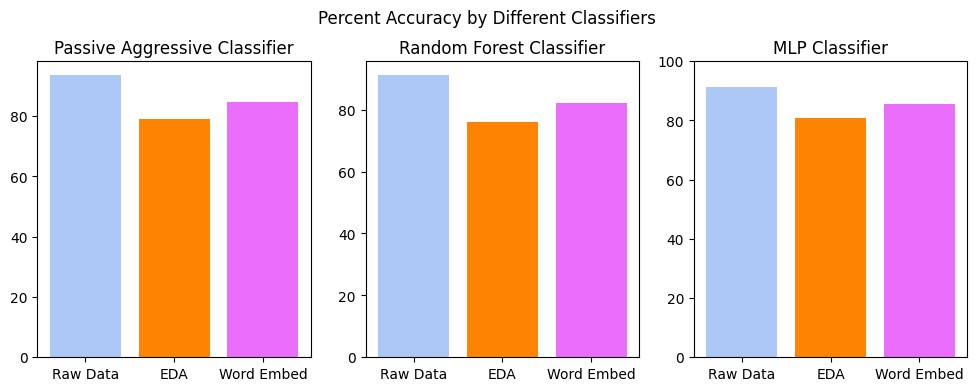

In [2]:
# Input your own data for the bar graphs
data = [
    [93.47,79.09 ,84.69 ],
    [91.07,76.15,82.1],
    [91.45,80.98,85.59 ]
]

# Set up the subplots and define the subplot names
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
subplot_names = ['Passive Aggressive Classifier', 'Random Forest Classifier', 'MLP Classifier']

# Set up the colors for each subplot
colors = [[custom_color1, custom_color2, custom_color4], [custom_color1, custom_color2, custom_color4], [custom_color1, custom_color2, custom_color4]]

# Create a bar chart for each subplot with its respective name and colors
for i, ax in enumerate(axs):
    ax.bar(range(3), data[i], color=colors[i])
    ax.set_title(subplot_names[i])

# Add some labels and a common title
fig.suptitle('Percent Accuracy by Different Classifiers')
xticks_labels = ['Raw Data', 'EDA', 'Word Embed']
for ax in axs:
    ax.set_xticks(range(3))
    ax.set_xticklabels(xticks_labels)

# Adjust spacing between the suptitle and subplots
plt.subplots_adjust(top=0.85)
plt.ylim(0, 100)
# Show the plot
plt.show()


## Graph 2-?: Textual Analysis Pre and Post Attack 

- [ ] just combine data A file with this one, support CSV with unknown number of rows, make sure all results are shown, accept csv as input (will need to run once per method used)

- [x] REMOVE STOP WORDS

- [x] freq

- [ ] word len

- [ ] diversity and density

In [3]:
#STARTING FILE
startingDf = pd.read_csv("hate_tweets.csv") #changed based on file used to augment

bertDf = startingDf

#WORD EMBED FILE
wEmbedDf = pd.read_csv("word_embedding_glove.csv")

#EDA FILE
edaDf = pd.read_csv("augmented_hate_tweets.csv") #EDA
edaDf = edaDf.rename(columns={'0': 'tweet'})


In [4]:
#REMOVE STOP WORDS AND STORE IN "tweet-StopRemoved"

# Define the list of stop words
stop_words = set(stopwords.words('english'))

# Define the set of punctuation to remove
punctuation = set(string.punctuation)

def remove_stop_words(text):
    tokens = word_tokenize(text)
    # remove stop words and lower case all characters
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    # remove punctuation, quotes, exclamation marks, periods, empty/whitespace strings, backticks, and ellipses
    filtered_tokens = [token for token in filtered_tokens if token not in punctuation and token not in ["'", '"', '!', '.', '', ' ', '``', "''", '...']]
    return ' '.join(filtered_tokens)



# Apply the function to the 'tweet' column of the input and output DataFrames
startingDf['tweet-StopRemoved'] = startingDf['tweet'].apply(remove_stop_words) #changed startingDF col name based on csv
edaDf['tweet-StopRemoved'] = edaDf['tweet'].apply(remove_stop_words) #change endingDf col name based on csv
wEmbedDf['tweet-StopRemoved'] = wEmbedDf['tweet'].apply(remove_stop_words) 
bertDf['tweet-StopRemoved'] = bertDf['tweet'].apply(remove_stop_words) 

0          rt
1       bitch
2      faggot
3        like
4         n't
5       nigga
6         ass
7          's
8       white
9        fuck
10       http
11      trash
12     nigger
13          u
14     128514
15    fucking
16        fag
17     niggas
18        're
19        get
20       8221
21         'm
22       8220
23    faggots
24       shit
Name: 0, dtype: object


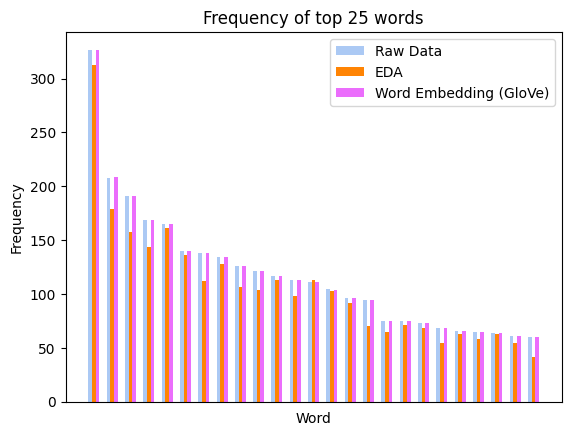

In [5]:
TOP_WORDS_TO_GRAB = 25

# count all of the unique words and their frequency
counters1 = pd.DataFrame(Counter(" ".join(startingDf["tweet-StopRemoved"]).split()).most_common(TOP_WORDS_TO_GRAB))
counters2 = pd.DataFrame(Counter(" ".join(edaDf["tweet-StopRemoved"]).split()).most_common(TOP_WORDS_TO_GRAB))
counters3 = pd.DataFrame(Counter(" ".join(wEmbedDf["tweet-StopRemoved"]).split()).most_common(TOP_WORDS_TO_GRAB))
counters4 = pd.DataFrame(Counter(" ".join(bertDf["tweet-StopRemoved"]).split()).most_common(TOP_WORDS_TO_GRAB))

print(counters1[0])

# extract words and frequencies from startingDf
words1 = " ".join(startingDf["tweet-StopRemoved"]).split()
freqs1 = Counter(words1)

# extract words and frequencies from endingDf
words2 = " ".join(edaDf["tweet-StopRemoved"]).split()
freqs2 = Counter(words2)

# extract words and frequencies from wEmbedDf
words3 = " ".join(wEmbedDf["tweet-StopRemoved"]).split()
freqs3 = Counter(words3)

# extract words and frequencies from bertDf
words4 = " ".join(bertDf["tweet-StopRemoved"]).split()
freqs4 = Counter(words4)

# get the most common words
words1_common, freqs1_common = zip(*freqs1.most_common(TOP_WORDS_TO_GRAB))

# plot the bar graph
x = list(range(len(words1_common)))
width = 0.2
plt.bar(range(len(words1_common)), freqs1_common, width, color=custom_color1, label='Raw Data')
plt.bar([i + width for i in range(len(words1_common))], [freqs2[w] for w in words1_common], width, color=custom_color2, label='EDA')
plt.bar([i + 2*width for i in range(len(words1_common))], [freqs3[w] for w in words1_common], width, color=custom_color4, label='Word Embedding (GloVe)')
#plt.bar([i + 3*width for i in range(len(words1_common))], [freqs4[w] for w in words1_common], width, color=custom_color3, label='Bert')

plt.xticks([]) #[i + width for i in range(len(words1_common))], words1_common to see ticks
plt.legend()
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title(f'Frequency of top {TOP_WORDS_TO_GRAB} words')
plt.show()


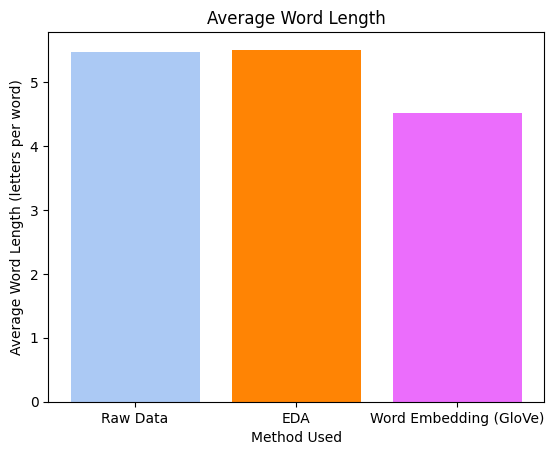

In [6]:
def get_total_avg_word_length(df):
    # convert 'tweet' column to list of tweets
    list_of_tweets = df['tweet'].tolist()

    # split each tweet into a list of tokens
    list_of_token_lists = [re.split(' ', s) for s in list_of_tweets]

    # calculate total average word length
    total_avg_word_length = 0
    for token_list in list_of_token_lists:
        current_avg_word_length = sum(map(len, token_list)) / len(token_list)
        total_avg_word_length += current_avg_word_length

    total_avg_word_length /= len(list_of_tweets)
    return total_avg_word_length

total_avg_word_length1 = get_total_avg_word_length(startingDf)
total_avg_word_length2 = get_total_avg_word_length(edaDf)
total_avg_word_length3 = get_total_avg_word_length(wEmbedDf)
total_avg_word_length4 = get_total_avg_word_length(bertDf)

custom_color1 = (171/255.0, 201/255.0, 244/255.0) #pure hate tweets
custom_color2 = (255/255.0, 132/255.0, 4/255.0) #EDA
custom_color3 = (200/255.0, 252/255.0, 146/255.0) #bert
custom_color4 = (235/255.0, 109/255.0, 252/255.0) #word embedding

# Create a list of labels for the x-axis
labels = ['Raw Data', 'EDA', 'Word Embedding (GloVe)']
colors = [custom_color1, custom_color2, custom_color4]

total_avg_word_length1 = get_total_avg_word_length(startingDf)
total_avg_word_length2 = get_total_avg_word_length(edaDf)
total_avg_word_length3 = get_total_avg_word_length(wEmbedDf)

# Create a list of the three average word lengths
averages = [total_avg_word_length1, total_avg_word_length2, total_avg_word_length3]

# Create a bar graph
plt.bar(labels, averages, color=colors)

# Add a title and axis labels
plt.title('Average Word Length')
plt.xlabel('Method Used')
plt.ylabel('Average Word Length (letters per word)')

# Show the graph
plt.show()


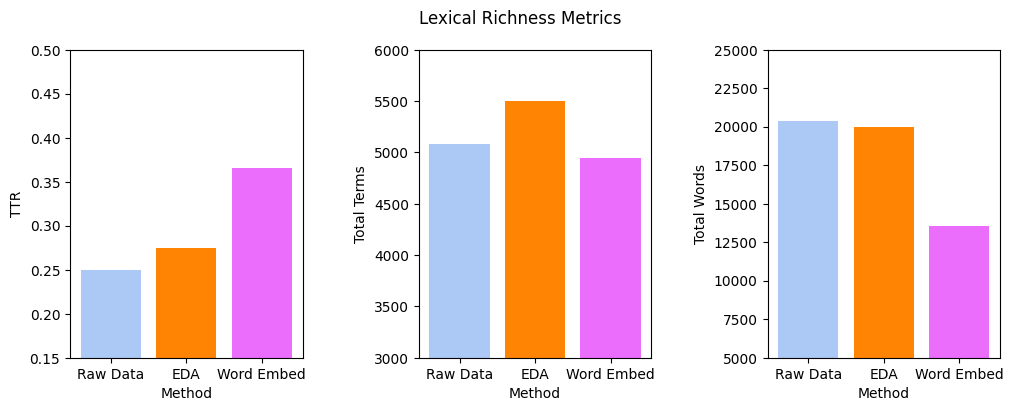

In [14]:
def calculate_lexical_richness(df):
    # Convert 'tweet' column to list of tweets
    list_of_tweets = df['tweet'].tolist()
    
    # Join all tweets into one string
    all_tweets_in_one_string = "".join(list_of_tweets)
    
    # Calculate TTR, total number of terms, and total number of words
    lex = LexicalRichness(all_tweets_in_one_string)
    ttr = lex.ttr
    total_terms = lex.terms
    total_words = lex.words
    
    return ttr, total_terms, total_words

# Calculate lexical richness for each dataframe
ttr1, total_terms1, total_words1 = calculate_lexical_richness(startingDf)
ttr2, total_terms2, total_words2 = calculate_lexical_richness(edaDf)
ttr3, total_terms3, total_words3 = calculate_lexical_richness(wEmbedDf)
ttr4, total_terms4, total_words4 = calculate_lexical_richness(bertDf)

x_labels = ['Raw Data', 'EDA', 'Word Embed'] #add 4th col "bert"
x_pos = np.arange(len(x_labels))

# Set the width of the bars
bar_width = 0.80

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the TTR for each dataframe in the first subplot
ax1.bar(x_pos, [ttr1, ttr2, ttr3], width=bar_width, color=colors) #add back ttr4 for bert
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('Method')
ax1.set_ylabel('TTR')

# Plot the total terms for each dataframe in the second subplot
ax2.bar(x_pos, [total_terms1, total_terms2, total_terms3], width=bar_width, color=colors) #add back total terms 3 for bert
ax2.set_xticks(x_pos)
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Method')
ax2.set_ylabel('Total Terms')

# Plot the total words for each dataframe in the third subplot
ax3.bar(x_pos, [total_words1, total_words2, total_words3], width=bar_width, color=colors) #add back total words 4 for bert
ax3.set_xticks(x_pos)
ax3.set_xticklabels(x_labels)
ax3.set_xlabel('Method')
ax3.set_ylabel('Total Words')

# Add a title for the entire figure
fig.suptitle('Lexical Richness Metrics')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)

# Set the y-axis limits for each subplot
ax1.set_ylim([.15, 0.50])
ax2.set_ylim([3000, 6000])
ax3.set_ylim([5000, 25000])


# Display the figure
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e803e9f0-f341-4e63-9e5c-ecfa91ec1687' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>